<a href="https://colab.research.google.com/github/banrovegrie/Machine-Learning/blob/master/Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

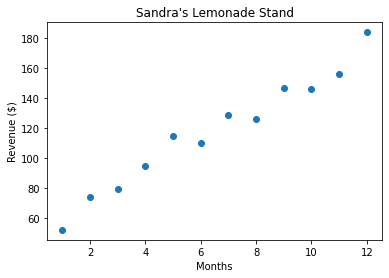

In [ ]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

### Equations Associated: 
- Equation for fit $$y = mx +  c$$
- Equation for loss calculation $$\sum_{\forall i \in n}(y_{actual} - y_{fit})^2$$
- Equation for Gradient Descent for intercept $$b_{gradient} = \frac{2}{n}\sum_{\forall i \in n}{(mx_i+b - y_i)}$$
- Equation for Gradient Descent for slope $$m_{gradient} = \frac{2}{n}\sum_{\forall i \in n}{x_i(mx_i+b - y_i)}$$
- Equation for $b_{new}$ and $m_{new}$ are $$b_{new} = b - (\alpha \times b_{gradient})$$ $$m_{new} = m - (\alpha \times m_{gradient})$$


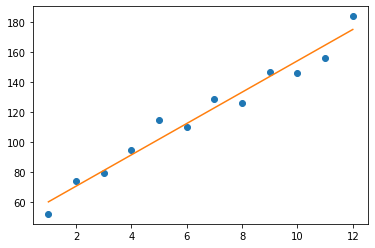

In [ ]:
def get_gradient_at_b(x, y, b, m):
  diff = 0
  n = len(x)
  for i in range(0, n):
    val = m*x[i]+b - y[i]  
    diff += val
  b_gradient = 2*diff/n
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  diff = 0
  n = len(x)
  for i in range(0, n):
    val = m*x[i]+b - y[i]  
    diff += val*x[i]
  m_gradient = 2*diff/n
  return m_gradient

def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
 
def gradient_descent(x, y, learning_rate, num_iterations):
  b, m = 0, 0
  for i in range(0, num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return [b, m]

X_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Y_values = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

b, m = gradient_descent(X_values, Y_values, 0.01, 1000)

y = [m*x + b for x in X_values]

plt.plot(X_values, Y_values, "o")
plt.plot(X_values, y)

plt.show()

In the above we have a well defined

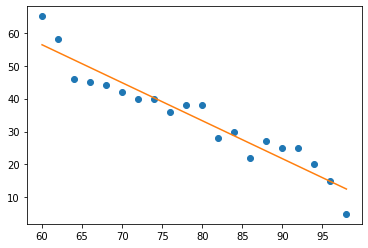

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')

line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predict = line_fitter.predict(temperature)

plt.plot(temperature, sales_predict)
plt.show()

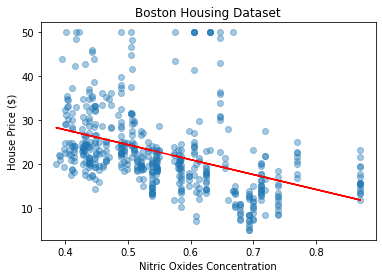

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
X = df[['NOX']]
y = boston.target

line_fitter = LinearRegression()
line_fitter.fit(X, y)
y_predict = line_fitter.predict(X)

plt.scatter(X, y, alpha=0.4)
plt.plot(X, y_predict, color = "red")

plt.title("Boston Housing Dataset")
plt.xlabel("Nitric Oxides Concentration")
plt.ylabel("House Price ($)")
plt.show()

  state    numcol  yieldpercol  ...  priceperlb   prodvalue  year
0    AL   16000.0           71  ...        0.72    818000.0  1998
1    AZ   55000.0           60  ...        0.64   2112000.0  1998
2    AR   53000.0           65  ...        0.59   2033000.0  1998
3    CA  450000.0           83  ...        0.62  23157000.0  1998
4    CO   27000.0           72  ...        0.70   1361000.0  1998

[5 rows x 8 columns]


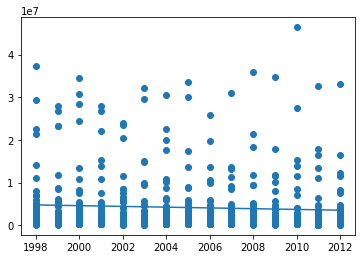

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

print(df.head())
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

X = df["year"]
X = X.values.reshape(-1, 1)
y = df["totalprod"]

regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predict = regr.predict(X)

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()

# Multiple Linear Regression

Associated Equation is $y = b + m_1x_1 + m_2x_2 + ... + m_nx_n$
​	

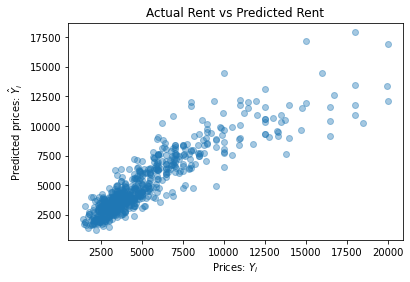

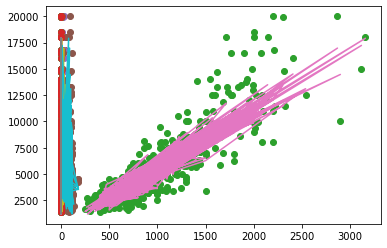

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


In [37]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split


streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

plt.plot(x_test, y_test, 'o') 
plt.plot(x_test, y_predict)
plt.show()

print(mlr.coef_)